In [1]:
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
from torch.optim import *

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

In [2]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/skin-cancer-mnist-ham10000")

In [13]:
df = pd.read_csv(path / "images/df.csv")[["image_id", "dx"]]
df.head(1)

,image_id,dx
0,ISIC_0027419,bkl


In [14]:
data = (
    (
        ImageList.from_df(df, suffix=".jpg", path=path / "images")
        .split_by_rand_pct()
        .label_from_df(cols="dx")
        .transform(get_transforms(), size=64)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

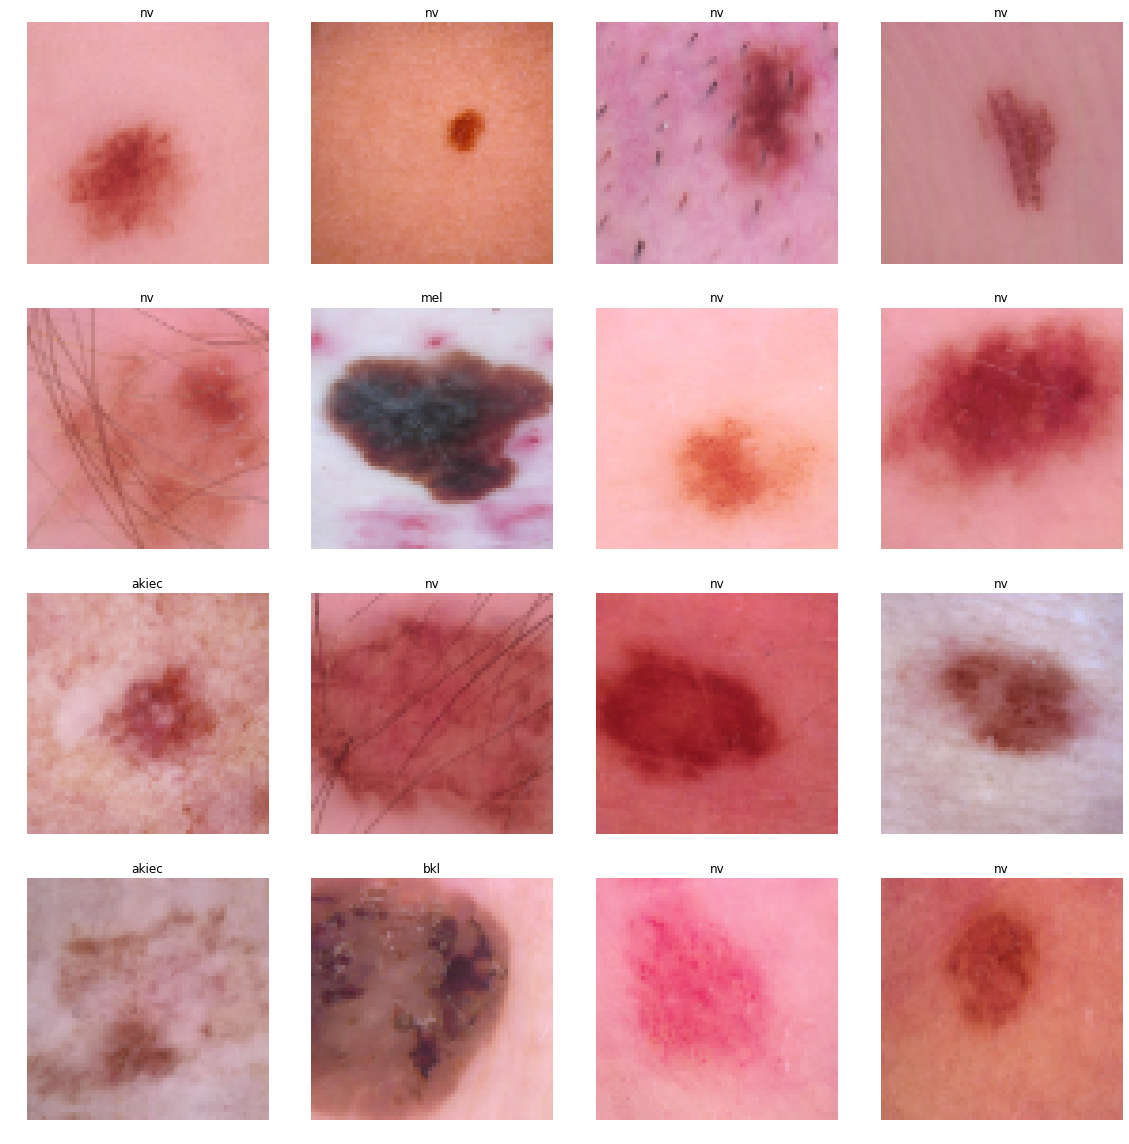

In [15]:
data.show_batch(4)

In [16]:
data.c

7

In [24]:
class_sam = [str(x) for x in data.train_ds.y]

(array([ 856., 5404.,    0.,   93.,    0.,  890.,  113.,    0.,  402.,  254.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

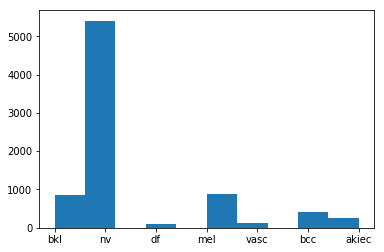

In [26]:
plt.hist(class_sam)

In [27]:
from fastai.callbacks import OverSamplingCallback

In [33]:
learn = None
gc.collect()

6957

# resnet34, adamW, over sampling

In [35]:
learn = cnn_learner(
    data, models.resnet34, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph, OverSamplingCallback]
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


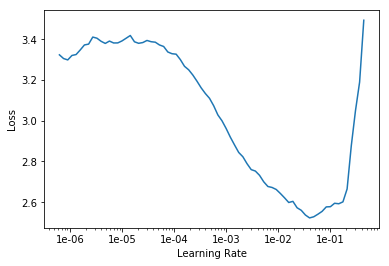

In [31]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.655261,0.780172,0.700449,01:22
1,0.408353,0.812746,0.673989,01:20
2,0.353479,0.826134,0.727908,01:18
3,0.344987,0.749367,0.745382,01:19
4,0.254821,0.702918,0.751872,01:18
5,0.224593,0.690123,0.746380,01:18
6,0.191943,0.661488,0.775836,01:18
7,0.168629,0.683151,0.791313,01:20
8,0.149430,0.823120,0.778832,01:19
9,0.123259,0.742200,0.807289,01:19


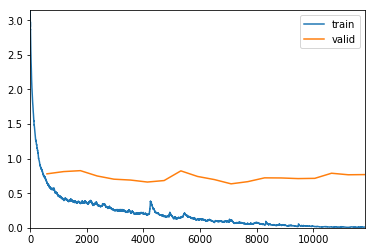

In [36]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-4,1e-2), wd=1e-3)

In [ ]:
learn.show_results()

# resnet34, adamW, No over sampling

In [44]:
learn = None
gc.collect()

10611

In [45]:
learn = cnn_learner(
    data, models.resnet34, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph]
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


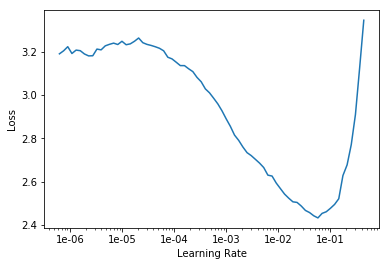

In [39]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.912470,1.319678,0.538692,01:19
1,1.049938,0.878956,0.667998,01:19
2,0.630277,0.776073,0.710434,01:18
3,0.417713,0.719077,0.729406,01:17
4,0.303429,0.765468,0.730904,01:17
5,0.249163,0.661697,0.765851,01:18
6,0.171225,0.704482,0.779331,01:20


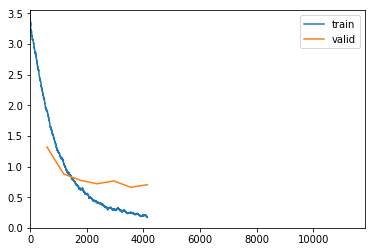

KeyboardInterrupt: 

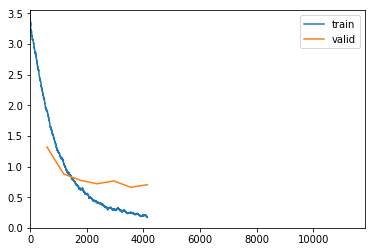

In [46]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-4, wd=1e-3)

# resnet50, adamW, over sampling

In [47]:
learn = None
gc.collect()

4725

In [48]:
learn = cnn_learner(
    data, models.resnet50, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph,OverSamplingCallback]
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


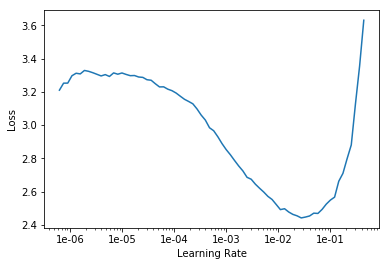

In [49]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.495891,0.805354,0.705442,01:21
1,0.458530,0.808153,0.685472,01:21
2,0.646082,1.123422,0.608587,01:19
3,0.554572,1.435666,0.561158,01:22


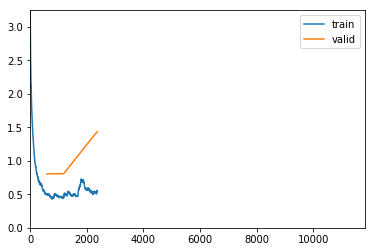

KeyboardInterrupt: 

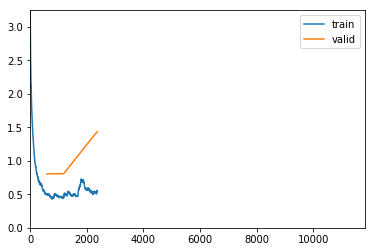

In [50]:
learn.unfreeze()
learn.fit_one_cycle(20, 4e-3, wd=1e-3)

# resnet34, adamW,  over sampling, no pretrained+mixup

In [55]:
learn = None
gc.collect()

22171

In [56]:
learn = cnn_learner(
    data, models.resnet34, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph,OverSamplingCallback],pretrained=False
).mixup().to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


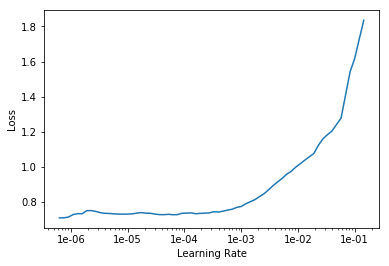

In [60]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.249606,1.444137,0.492262,01:19
1,1.872822,1.286325,0.525212,01:19
2,1.587234,1.002496,0.579631,01:19
3,1.405243,0.981827,0.594109,01:19
4,1.299173,1.258414,0.491762,01:19
5,1.237906,1.034620,0.583125,01:20
6,1.149032,0.898138,0.649026,01:19
7,1.122578,0.895769,0.626560,01:21
8,1.044776,0.915396,0.634049,01:20
9,1.054309,0.904553,0.634049,01:19


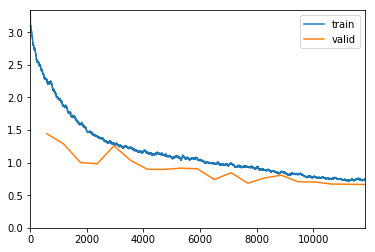

In [58]:
learn.unfreeze()
learn.fit_one_cycle(20, 3e-4, wd=1e-1)

In [59]:
learn.save('mix-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.761159,0.725296,0.744383,01:19
1,0.788770,0.768016,0.718422,01:18
2,0.817087,0.772286,0.717424,01:19
3,0.810820,0.717817,0.738892,01:18
4,0.776343,0.716372,0.734398,01:19
5,0.742446,0.699932,0.740389,01:18
6,0.710005,0.665166,0.771343,01:18
7,0.701805,0.636117,0.784324,01:18
8,0.682592,0.649612,0.778832,01:19
9,0.699853,0.645491,0.779830,01:18


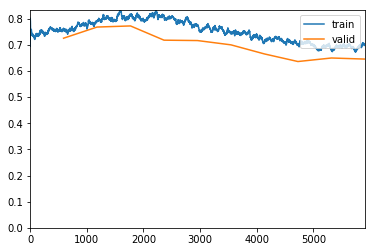

In [61]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-4, wd=1e-2)

# resnet34, adamW,  over sampling, pretrained, mixup

In [62]:
learn = None
gc.collect()

15747

In [63]:
learn = cnn_learner(
    data, models.resnet34, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph,OverSamplingCallback],pretrained=True
).mixup().to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


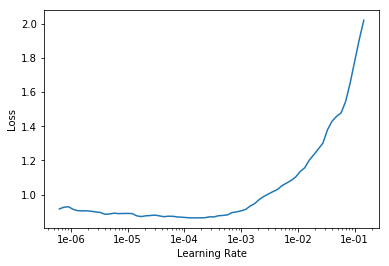

In [67]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.768729,1.973700,0.279581,01:18
1,2.261437,1.348872,0.541188,01:20
2,1.885356,1.159997,0.596106,01:21
3,1.629713,0.975085,0.634548,01:21
4,1.425505,0.909624,0.650524,01:21
5,1.290210,0.868744,0.659511,01:18
6,1.176181,0.833162,0.665003,01:19
7,1.111726,0.815097,0.678482,01:19
8,1.063232,0.773330,0.710934,01:20
9,1.014746,0.734482,0.725911,01:18


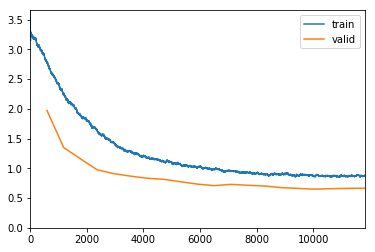

In [65]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-4), wd=1e-1)

In [69]:
learn.save('mix-pre-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.888913,0.628795,0.760359,01:18
1,0.874701,0.665679,0.747878,01:20
2,0.858932,0.670052,0.739391,01:18
3,0.858777,0.641543,0.752871,01:20
4,0.862281,0.661215,0.743884,01:19
5,0.853045,0.644536,0.752371,01:19
6,0.867166,0.650890,0.753370,01:18
7,0.868789,0.646554,0.756365,01:20
8,0.847447,0.664853,0.743884,01:20
9,0.847441,0.652881,0.750374,01:19


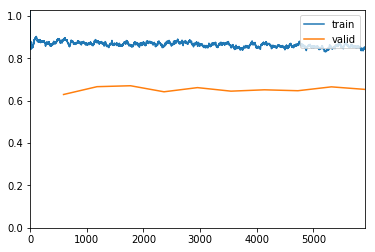

In [68]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-6, wd=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.209550,0.824884,0.688967,01:30
1,0.985273,0.740160,0.721418,01:31
2,0.937747,0.747311,0.710434,01:30
3,0.860972,0.672430,0.755367,01:23
4,0.823000,0.680574,0.754368,01:19
5,0.883420,0.633557,0.788817,01:19
6,0.858580,2.480661,0.740889,01:19
7,0.883092,0.850440,0.723914,01:20
8,1.027593,nan,0.750874,01:19
9,1.049220,1.576455,0.724913,01:19


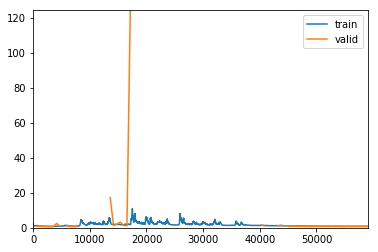

In [70]:
learn.unfreeze()
learn.fit_one_cycle(100, slice(1e-3, 1e-1), wd=1e-2)

# xresnet34, adamW,  over sampling, pretrained, mixup

In [71]:
learn = None
gc.collect()

36691

In [74]:
learn = Learner(
    data, models.xresnet34(), metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph,OverSamplingCallback]
).mixup().to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


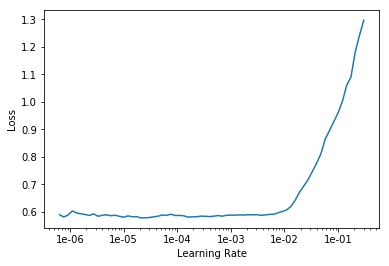

In [78]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.354598,1.093629,0.580629,01:18
1,1.223664,0.971177,0.599101,01:18
2,1.144283,0.939406,0.668497,01:18
3,1.052988,1.065523,0.606590,01:19
4,0.980559,0.798859,0.709935,01:18
5,0.935337,0.726190,0.742886,01:18
6,0.872377,0.815643,0.711932,01:18
7,0.835426,0.734950,0.710934,01:18
8,0.800959,0.746723,0.724413,01:18
9,0.765282,0.736457,0.742386,01:18


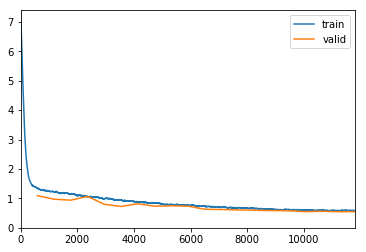

In [76]:
learn.unfreeze()
learn.fit_one_cycle(20, 2e-3, wd=1e-3)

In [85]:
learn.save('mix-pre-x-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.582374,0.548000,0.824763,01:18
1,0.579131,0.549282,0.823265,01:18
2,0.585416,0.546449,0.825761,01:18
3,0.585556,0.548781,0.822766,01:19
4,0.592938,0.545252,0.828757,01:18
5,0.580574,0.547634,0.823764,01:19
6,0.589757,0.549384,0.824763,01:19
7,0.586447,0.548979,0.827758,01:19
8,0.580356,0.546243,0.825262,01:18
9,0.577338,0.544936,0.828757,01:19


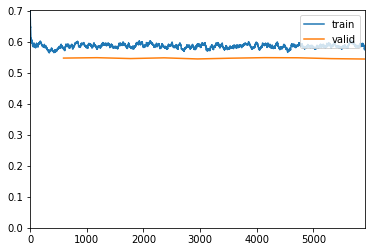

In [79]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-6, wd=1e-3)

# vgg16bn, adamW,  over sampling, pretrained, mixup

In [71]:
learn = None
gc.collect()

36691

In [86]:
learn = cnn_learner(
    data, models.vgg16_bn, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph,OverSamplingCallback]
).mixup().to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


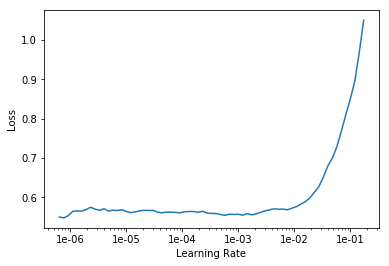

In [89]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.097220,0.800268,0.663505,01:22
1,1.039054,0.885737,0.671493,01:22
2,1.287126,0.887188,0.688967,01:18
3,1.105287,0.785474,0.690964,01:19
4,0.985370,0.809660,0.690964,01:19
5,0.937622,0.740556,0.729406,01:19
6,0.872257,0.842790,0.664503,01:20
7,0.817608,0.736869,0.737394,01:21
8,0.803725,0.938888,0.655017,01:19
9,0.761060,0.646987,0.759361,01:19


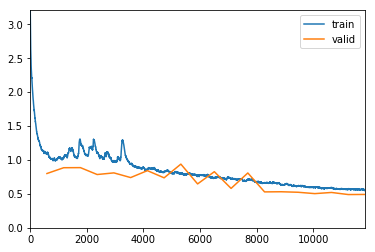

In [88]:
learn.unfreeze()
learn.fit_one_cycle(20, 6e-3, wd=1e-3)

In [90]:
learn.save('vgg16-pre-x-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.572741,0.494156,0.852721,01:18
1,0.595230,0.499288,0.842237,01:20
2,0.595707,0.545457,0.838243,01:23
3,0.598750,0.576799,0.818273,01:21
4,0.568712,0.511258,0.853220,01:18
5,0.563125,0.494283,0.853719,01:18
6,0.559555,0.495443,0.853220,01:19
7,0.555863,0.509313,0.854718,01:19
8,0.538385,0.497164,0.855716,01:19
9,0.531352,0.498032,0.855716,01:19


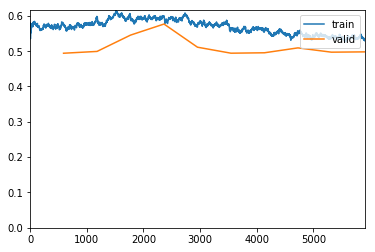

In [91]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, wd=1e-2)

# vgg19bn, adamW,  over sampling, pretrained, mixup

In [92]:
learn = None
gc.collect()

15392

In [93]:
learn = cnn_learner(
    data, models.vgg19_bn, metrics=[accuracy], opt_func=AdamW, callback_fns=[ShowGraph,OverSamplingCallback]
).mixup().to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


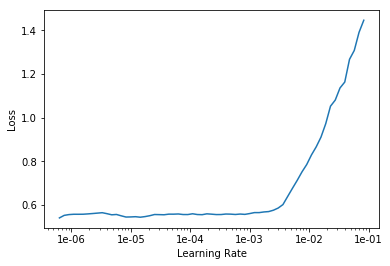

In [97]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3,5e-2), wd=1e-3)

In [96]:
learn.save('vgg19-pre-x-1')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, wd=1e-2)